In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from PIL import Image
import numpy as np
import torch
import cv2
import os
import matplotlib.pyplot as plt

from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
import numpy as np
torch.set_printoptions(linewidth=120)
import cv2
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
torch.set_printoptions(linewidth=120)
from shutil import copy
plt.ion()   # interactive mode

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import f1_score, accuracy_score

In [0]:
root = "/content/drive/My Drive/mini/segmentation/ead2020_semantic_segmentation"


In [4]:
in_trans = transforms.Compose([
                                 transforms.Resize((400,400),interpolation=2),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

out_trans = transforms.Compose([
                                transforms.Resize((400,400),interpolation=2),
                                transforms.ToTensor(),
                                #transforms.Normalize(mean=[0.485],std=[0.229])
])
class EndoData(Dataset):
    def __init__(self,in_dir,out_dir):
        self.in_dir = in_dir
        self.out_dir = out_dir
        os.chdir(in_dir)
        self.in_list = os.listdir()
        self.in_list.sort()
        os.chdir(out_dir)
        self.out_list = os.listdir()
        self.out_list.sort()
        print(self.in_list == self.out_list)
        
    def __len__(self):
        return len(self.in_list)

    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        os.chdir(self.in_dir)
        in_name = self.in_list[idx]
        in_image = Image.open(in_name)
        in_image = in_trans(in_image)

        os.chdir(self.out_dir)
        out_name = self.out_list[idx]
        out_image = Image.open(out_name)
        # print(out_image.size)
        out_image = out_trans(out_image)
        sample = {'in_image': in_image.cuda(), 
                  'out_image': out_image.cuda()
                  }
        return sample
endocvdataset = EndoData('/content/drive/My Drive/mini/augment/output','/content/drive/My Drive/mini/augment/output2')

False


In [0]:
# os.mkdir('/content/drive/My Drive/mini/models/fcn/')

In [0]:
# fcn = UNet(3,1).cuda()
# fcn = torch.load('/content/drive/My Drive/mini/models/unet1/84.pt')
fcn = torchvision.models.segmentation.fcn_resnet101(pretrained=False, progress=True, num_classes=1).cuda()
batch_size = 2
train_loader = torch.utils.data.DataLoader(endocvdataset,batch_size)
optimizer = optim.Adam(fcn.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()

epoch = 0
no_of_epoch = 500
for epoch in range(0, no_of_epoch):
    total_loss = 0
    total_correct = 0
    counter = 0
    f1 = 0
    acc = 0
    for batch in train_loader:
        input_imgs,output_imgs = batch['in_image'],batch['out_image']
        preds = fcn(input_imgs.float())

     #training summarized
   #print(preds.shape)#,output_imgs)
        
        y = output_imgs
        y_pred = preds['out']
        #print("\npred:",torch.max(y_pred))
        # print(y_pred[0], y)
        
        correctcount = + float(torch.sum(torch.flatten(y_pred)==torch.flatten(y))/len(torch.flatten(y_pred)))
        loss = criterion(y_pred, y.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
        counter+=1
        if((counter/batch_size)%2 == 0):
          print(counter/batch_size,end='')
    acc += correctcount/batch_size

        #f1+=f1_score(y, y_pred) #f1_score(preds.float().flatten().detach().cpu(),output_imgs.float().flatten().detach().cpu())
    torch.save(fcn,'/content/drive/My Drive/mini/models/fcn/'+str(epoch)+'.pt')
        
#         total_correct+=get_num_correct(preds,labels)
    print("epoch:",epoch,"total_loss:",total_loss)#, "f1:",f1)
    print("----------------------------")
    fi = open('/content/drive/My Drive/mini/trainviewer_fcn.txt', "a+")
    fi.write(str(epoch)+","+str(total_loss)+"\n")
    # logfile=open("/content/drive/My Drive/mapdata_processed/model/test12/LOG.txt", "a+")
    # logfile.write("epoch:"+str(epoch)+" total_loss:"+str(total_loss)+"\n")
    # logfile.close()

2.04.06.08.010.012.014.016.018.020.022.024.026.028.030.032.034.036.038.040.042.044.046.048.050.052.054.056.058.060.062.064.066.068.070.072.074.076.078.080.082.084.086.088.090.092.094.096.098.0100.0

In [15]:
c = torch.sum(torch.Tensor([True, False]))/2
print(c)

tensor(0.5000)


Don't run this now

In [0]:
  import torchvision
  ##################### batch - 47
from PIL import Image
fcn = torch.load('/content/drive/My Drive/mini/models/fcn/37.pt')

in_trans = transforms.Compose([
                                 transforms.Resize((400,400),interpolation=2),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 

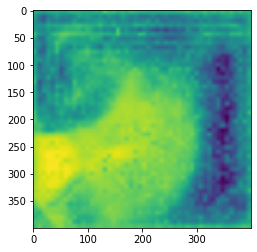

In [0]:
for i in os.listdir('/content/drive/My Drive/mini/segmentation/ead2020_semantic_segmentation/images_ead2020'):
  root = '/content/drive/My Drive/mini/segmentation/ead2020_semantic_segmentation/images_ead2020'
  test_img = Image.open(root+'/'+i)
  test_img = in_trans(test_img)
  output = fcn(test_img.cuda().unsqueeze(0).float())
  img = output['out'].detach().cpu().numpy()
  oimg = np.moveaxis(img[0], -1, 0)
  img = np.moveaxis(oimg, -1, 0)
  print(img.shape)
  plt.imshow(img[:,:,0])
  
  # img = np.reshape(img,(224,224,3))
  img = cv2.resize(img,(608,608))

  img = img*255

  cv2.imwrite('/content/drive/My Drive/mini/fcnop/'+i,img)